In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import nan as NA
import pydataset

In [3]:
np.random.seed(1234)
num=np.random.randn(1000)
s=pd.qcut(num,4,labels=['A1','A2','A3','A4'])
#num.groupy 불가능 : (num= np.nd array) categorical 연산 
pd.Series(num).groupby(s).agg([('평균','mean'),('합계','sum')])

,평균,합계
A1,-1.217922,-304.480477
A2,-0.288564,-72.141089
A3,0.314758,78.689568
A4,1.254690,313.672580


In [44]:
#0123중 중복허용 20개 뽑은 리스트 li 
np.random.seed(1234)
np.random.choice([0,1,2,3],20)
np.random.randint(0,4,20)
np.random.seed(1234)
li= random.choices([0,1,2,3],k=20) #random모듈 
li

[1, 0, 2, 2, 0, 3, 1, 3, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2]

In [10]:
np.random.seed(1234)
li= random.choices([0,1,2,3],k=20) #random모듈 
li
blood_type = ["A", "B", "O", "RH-"]
#카테고리형 데이터로 변환 
cat=pd.Categorical.from_codes(li,blood_type)
cat

['A', 'B', 'A', 'A', 'O', ..., 'A', 'A', 'B', 'B', 'B']
Length: 20
Categories (4, object): ['A', 'B', 'O', 'RH-']

In [22]:
names = ['주원', '민서', '시우', '하준', '하은', '도윤', "한영", '도현', '성현', '지유', '민준', '지민', '지호', '서현', '준우', '서연', '하윤', '서윤', '지우', '윤서']
pd.Series(names).groupby(cat).count()

A      6
B      6
O      1
RH-    7
dtype: int64

In [50]:
#창고 데이터 
inv= pd.read_excel('inventory_Seoul.xlsx')
inv[:3]

#총재고수량  & defective zone의 재고수량 
inv['재고수량(A)'].sum()
#count 하면 총 행이나옴. 근데 하나의 로케이션에 여러개 재고가 있을 수 있어서 sum
inv[inv['로케이션명'].str.contains("Defective")]['재고수량(A)'].sum()
inv[inv['로케이션명'] == 'Defective Zone']['재고수량(A)'].sum()

11

In [63]:
import pandas as pd
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::',
                      header=None, names=unames,engine='python', encoding_errors='ignore')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',
                        header=None, names=rnames, engine='python',encoding_errors='ignore')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',
                       header=None, names=mnames, engine='python',encoding_errors='ignore') 
users

C:\Users\user\AppData\Local\Temp\ipykernel_10500\1085851201.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('users.dat', sep='::',


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [87]:
#3개 다 merge
data=pd.merge(pd.merge(users,ratings),movies)
data
a=data
#GENDER별 영화의 RATING평균 -> 평균이라고 .agg('mean) 하면 전체의 평균이 되어버림
mean_ratings=data.pivot_table('rating', index="title",columns="gender")
#여자로 내림차순 , 남자는 오름차순 , sort_values -> s주의 
mean_ratings.sort_values(['F','M'], ascending=[False,True])

gender,F,M
title,,
Country Life (1994),5.0,2.000000
"Woman of Paris, A (1923)",5.0,2.428571
"Other Side of Sunday, The (Sndagsengler) (1996)",5.0,2.928571
Belly (1998),5.0,3.000000
For the Moment (1994),5.0,3.000000
...,...,...
Follow the Bitch (1998),NaN,5.000000
Lured (1947),NaN,5.000000
Schlafes Bruder (Brother of Sleep) (1995),NaN,5.000000


## 2012년 연방선거관리위원회 

In [337]:
fec=pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/fec/P00000001-ALL.csv')
fec.info() #objet = 문자열

#한 행만 보고싶을 때 
fec.iloc[[134546]]
fec[123456:123457]

C:\Users\user\AppData\Local\Temp\ipykernel_10500\646123807.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec=pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/fec/P00000001-ALL.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
123456,C00431445,P80003338,"Obama, Barack","ELLMAN, IRA",TEMPE,AZ,852816719,ARIZONA STATE UNIVERSITY,PROFESSOR,50.0,01-DEC-11,NaN,NaN,NaN,SA17A,772372


In [338]:
fec[:3]
#fec.iloc[:,[2,5,7,8,9]][:3]
#fec.cand_nm.unique()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073


In [339]:
#필요한 칼럼만 뽑기 , 위에 info의 칼럼 숫자 보고 
fec.iloc[:,[2,5,7,8,9]][:3]
fec.cand_nm.unique()
#소속 정당넣기
#데이터
parties = {'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'} 
#매핑으로 칼럼추가 그냥넣으면 NaN 값 
fec['party']=fec['cand_nm'].map(parties)
#열 순서 바꾸기 데프 
fec


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOMATIC),NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOMATIC),SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


In [340]:
# 기부금 (contb_recipt_amt) RANGE MIN, MAX 범위 보기 가능
fec.contb_receipt_amt.describe()

count    1.001731e+06
mean     2.982352e+02
std      3.749667e+03
min     -3.080000e+04
25%      3.500000e+01
50%      1.000000e+02
75%      2.500000e+02
max      2.014491e+06
Name: contb_receipt_amt, dtype: float64

### 헷갈림 주의

In [341]:
#위아래 둘이 뭐가 다른지 T,F 나올때 True 만 셀려면 .sum() , count()하면 T,F 다 나옴 그러므로 
#이미 데이터 프레임으로 뽑힌 (fec[])로 한번 더 묶은 것들만 .count() 
fec[fec.contb_receipt_amt<0].count()
(fec.contb_receipt_amt<0).sum()

fec.query('contb_receipt_amt < 0 ')['contb_receipt_amt'].count() 
fec[fec['contb_receipt_amt'] < 0].count() 

cmte_id        9647
cand_id        9647
cand_nm        9647
contbr_nm      9647
contbr_city    9646
               ... 
memo_cd        3006
memo_text      3471
form_tp        9647
file_num       9647
party          9647
Length: 17, dtype: int64

In [342]:
#기부금액이 양수인 로우만 뽑기 
fec= fec[fec['contb_receipt_amt'] >= 0]
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [343]:
fec['cand_nm'].unique()


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [344]:
#Obama, Romney 만 뽑기 query에선 따옴표 주의 밖에 안의 따옴표 따로 구별해야돼.
#mrbo = mitt Romney, barack obama
fec_mrbo = fec[(fec['cand_nm'] == 'Obama, Barack') | (fec['cand_nm'] == 'Romney, Mitt')] 
fec_mrbo= fec.query('cand_nm== "Obama, Barack" |cand_nm=="Romney, Mitt"')
fec_mrbo = fec[fec.cand_nm.isin(["Obama, Barack", "Romney, Mitt"])] 
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,91280020.0,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,91280005.0,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,90120092.0,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


In [270]:
#중요 !! #같은 내용 다른 코드 ->하나의 결과로 매핑 , C.E.O 나눠진것은 CEO로 ! 
fec.contbr_occupation.value_counts()
occ_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
 'C.E.O.': 'CEO'}
emp_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'SELF' : 'SELF-EMPLOYED',
 'SELF EMPLOYED' : 'SELF-EMPLOYED',
} 

#기존 매핑법 : 싸그리 바꿔버려서 안겹치면 NaN 처리 해버림 . 그래서 절대 사용 X 
fec['contbr_occupation'].map(occ_mapping)
#해결: occ_mapping 딕셔너리 활용 d.get() -> 위에매핑값과 매칭이 안되면  NaN 이 아닌 원래값 
fec['contbr_occupation']=fec['contbr_occupation'].map(lambda x: occ_mapping.get(x,x))
fec['contbr_employer']=fec['contbr_employer'].map(lambda x: emp_mapping.get(x,x))

<Axes: ylabel='contbr_occupation'>

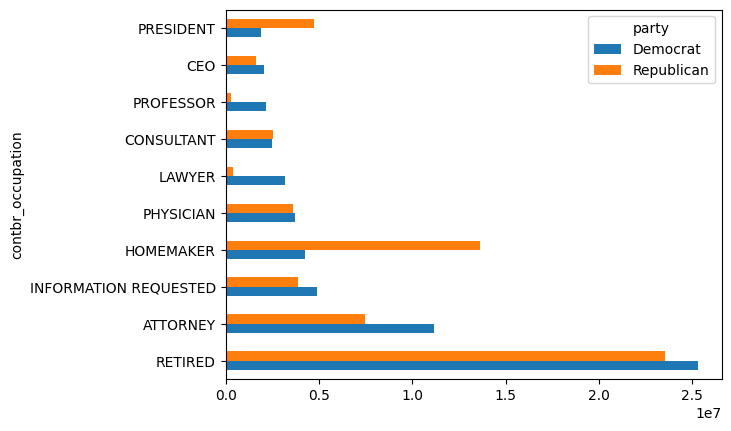

In [441]:
#직업별로 (그룹느낌) 기부금액들의 합 -> pivot
#Republican: NaN -> 특정 party에 기부한 republican이 없을 경우 
by_occupation=fec.pivot_table(values='contb_receipt_amt',
                              index='contbr_occupation',columns='party',
                              aggfunc=sum)
by_occupation
#democrat + republican >200000
over2mm= by_occupation[by_occupation.sum(axis=1)>200000]
over2mm
#민주당 상위 1 0위 #df로 만들려면 데모를 안에 넣어야함  , 수평막대그래프 = barh 
a=over2mm.sort_values('Democrat',ascending=False)[:10]
a.plot(kind='barh')


In [324]:
#오바마 롬니 후보별로 가장  많은 금액을 기부한 직군 
#nlargest?  n=7 상위 7개 n=5 기본값 
def get_top_amounts(group, key, n=5):
    totals=group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)
grouped=fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=7)

cand_nm        contbr_employer
Obama, Barack  RETIRED            22694358.85
               SELF-EMPLOYED      18626807.16
               NOT EMPLOYED        8586308.70
               NOT PROVIDED        5053480.37
               HOMEMAKER           2605408.54
                                     ...     
Romney, Mitt   HOMEMAKER           8147196.22
               SELF-EMPLOYED       7414115.22
               STUDENT              496490.94
               CREDIT SUISSE        281150.00
               MORGAN STANLEY       267266.00
Name: contb_receipt_amt, Length: 14, dtype: float64

contb_receipt_amt
(0, 1]                    570
(1, 10]                 43751
(10, 100]              404133
(100, 1000]            197348
(1000, 10000]           48470
(10000, 100000]             3
(100000, 1000000]           3
(1000000, 10000000]         4
dtype: int64

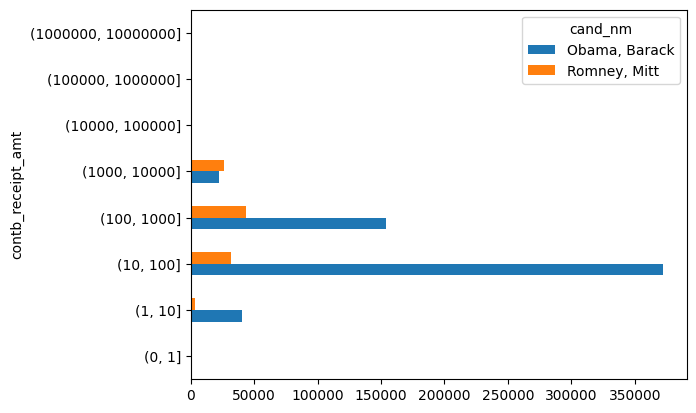

In [443]:
#기부금액 규모에 따른 히스토그램 , 오버마, 롬니 
#'contb_receipt_amt: 음수는 위에서 버림 이미 그래서 다 양수 

bins=([0,1,10,100,1000,10000,100000,1000000,10000000])
labels=pd.cut(fec_mrbo.contb_receipt_amt,bins)
grouped=fec_mrbo.groupby(['cand_nm',labels])
df=grouped.size().unstack(0)
df.plot(kind='barh')
df
df.sum(axis=1)

<Axes: ylabel='contb_receipt_amt'>

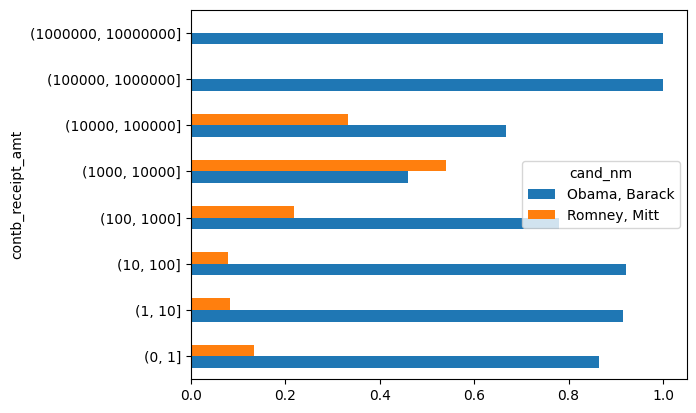

In [329]:
#후보자별 전체 기부금액 대비 비율 =#df/df.sum()
a = df.div(df.sum(axis=0),axis=1)*100
a
#행별로의 기부금액 비율,가로 합 =1 
#가로 합 
df.sum(axis=1)
#axis=0 , obama, Romney 비율 
ratio=df.div(df.sum(axis=1),axis=0) 
#그래프
ratio.plot(kind='barh')

# 신생아 이름

In [347]:
#압축푸는 앱 : 반디집
#window !type 역슬래시 \ 주의 , 쉼표로 구분되어있으니 df객체로 편하게  pd.read_csv

In [366]:
#!type babynames\yob1880.txt
names1880=pd.read_csv('babynames/yob1880.txt', names=['names','gender','births'])
names1880
#header=None 첫행부터 데이터 , 칼럼이름이 없다. 
#성별별 출생수를 모두 합한 값 
names1880.groupby('gender')['births'].sum()

gender
F     90993
M    110493
Name: births, dtype: int64

In [380]:
#중요 
#자료가 연도별 파일로 나눠져있으니 df 하나로 모은 다음 year 추가 
#1. concat : df 객체 합쳐준다.
#2. read_csv로 읽어온 원래 로우 순서는 몰라도 되니 ignore_index=True 
방법 1
years=range(1880,2011)

pieces=[]
columns=['name','gender','births']

for year in years:
    path= 'babynames/yob%d.txt' %year
    frame=pd.read_csv(path, names=columns)
    frame['year']=year
    pieces.append(frame)
    
names=pd.concat(pieces,ignore_index=True)
names

방법 2
df = pd.DataFrame()
years = range(1880, 2011)
columns = ['name', 'gender', 'births']
for year in years:
    path = f'babynames/yob{year}.txt'
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    df = pd.concat([df,frame])
df 

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


<Axes: title={'center': 'Total births by gender and year'}, xlabel='year'>

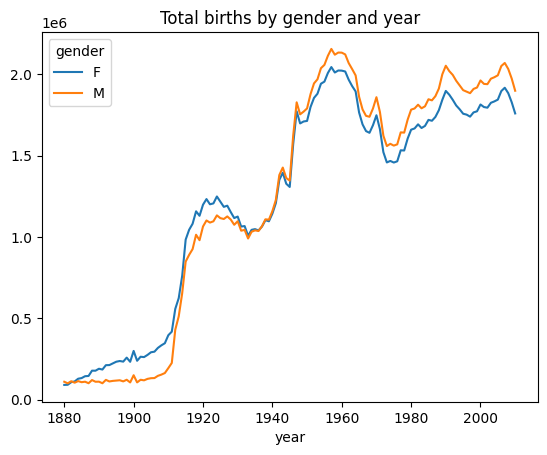

In [379]:
#연도나 성별에 따른 데이터 수집 
total_births=names.pivot_table('births',index='year',columns='gender',aggfunc=sum)
total_births.plot(title='Total births by gender and year')

In [445]:
#각 이름이 성별별 출생수에서 차지하는 비율, 특정이름 /여자전체비율 
#proportion 비율 
def add_prop(g):
    g['prop']=g['births']/g['births'].sum()
    return g
names=names.groupby(['year','gender']).apply(add_prop)
#gender 별 sum 이 다름 
names


#새너티 테스트 : 그룹 간련 연산에서 모든 그룹의 prop컬럼의 합이 1인지 확인
names.groupby(['year','gender']).prop.sum()

C:\Users\user\AppData\Local\Temp\ipykernel_10500\2276161828.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names=names.groupby(['year','gender']).apply(add_prop)


year  gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2008  M         1.0
2009  F         1.0
      M         1.0
2010  F         1.0
      M         1.0
Name: prop, Length: 262, dtype: float64

In [449]:
#연도별/ 성별별 선호하는 이름 100개  
def get_top100(g):
    return g.sort_values(by='births', ascending =False)[:100]
grouped=names.groupby(['year','gender'])
top100=grouped.apply(get_top100)
#그룹 색인 필요없어서 삭제 
top100.reset_index(inplace=True, drop=True)
top100
#reset_index (drop=True), 인덱스 열을 보통의 자료열로 올리는 것이 아니라 그냥 버리게 된다.

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
26195,Hayden,M,4151,2010,0.002187
26196,Bryan,M,3914,2010,0.002062
26197,Max,M,3819,2010,0.002012
26198,Jaxon,M,3802,2010,0.002003


#방법2

In [451]:
pieces=[]
for year,g in names.groupby(['year','gender']):
    pieces.append(g.sort_values(by='births',ascending=False)[:100])
top100=pd.concat(pieces, ignore_index=True)

top100

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
26195,Hayden,M,4151,2010,0.002187
26196,Bryan,M,3914,2010,0.002062
26197,Max,M,3819,2010,0.002012
26198,Jaxon,M,3802,2010,0.002003


## 이름 유행 분석

In [433]:
#top100에서  이름 ,년도 별 몇명 있는지
boys=top100[top100.gender=='M']
girls=top100[top100.gender=='F']
total_births=top100.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births

name,Aaliyah,Aaron,Abigail,Ada,Adam,Addie,Addison,Adrian,Agnes,Aidan,...,Willis,Wilma,Woodrow,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,652.0,NaN,274.0,NaN,NaN,473.0,NaN,...,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,628.0,NaN,287.0,NaN,NaN,424.0,NaN,...,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,689.0,NaN,341.0,NaN,NaN,565.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,778.0,NaN,362.0,NaN,NaN,623.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,854.0,NaN,356.0,NaN,NaN,703.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,3737.0,8279.0,15615.0,NaN,6775.0,NaN,7610.0,7373.0,NaN,10025.0,...,NaN,NaN,NaN,5826.0,6168.0,NaN,NaN,10986.0,5145.0,NaN
2007,3941.0,8914.0,15447.0,NaN,6770.0,NaN,11940.0,7719.0,NaN,8409.0,...,NaN,NaN,NaN,6514.0,6541.0,NaN,NaN,10198.0,4925.0,NaN
2008,4028.0,8511.0,15045.0,NaN,6074.0,NaN,10742.0,7911.0,NaN,7687.0,...,NaN,NaN,NaN,7292.0,6258.0,NaN,NaN,9195.0,4764.0,3438.0


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

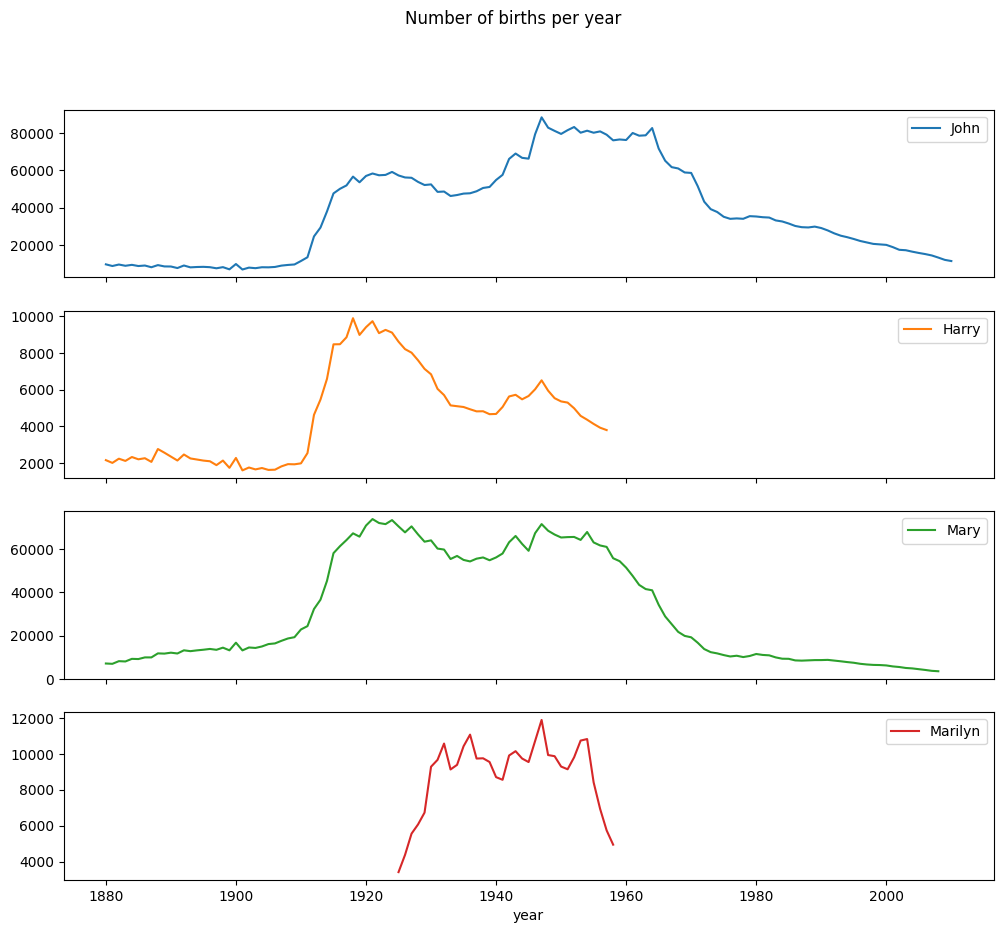

In [435]:
#원하는 이름을 뽑아서 연도별  추이 그래프 
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

### 다양한 이름 사용하는 경향 측정

<Axes: title={'center': 'Sum of table 100.prop by year and gender'}, xlabel='year'>

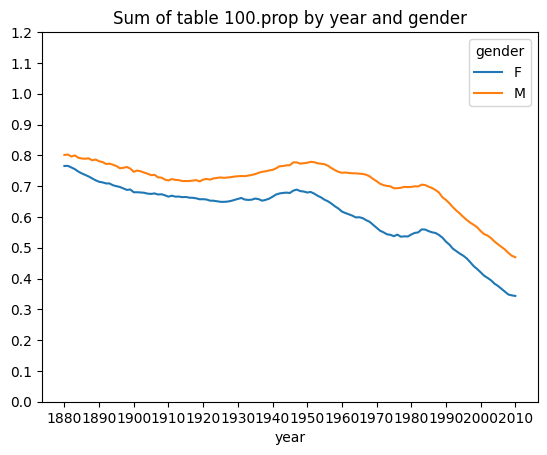

In [456]:
table=top100.pivot_table('prop',index='year',columns='gender',aggfunc=sum)
table.plot(title='Sum of table 100.prop by year and gender', 
          yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [457]:
df=boys[boys.year==2010]
df

,name,gender,births,year,prop
26100,Jacob,M,21875,2010,0.011523
26101,Ethan,M,17866,2010,0.009411
26102,Michael,M,17133,2010,0.009025
26103,Jayden,M,17030,2010,0.008971
26104,William,M,16870,2010,0.008887
...,...,...,...,...,...
26195,Hayden,M,4151,2010,0.002187
26196,Bryan,M,3914,2010,0.002062
26197,Max,M,3819,2010,0.002012
26198,Jaxon,M,3802,2010,0.002003


In [460]:
prop_cumsum=df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum

26100    0.011523
26101    0.020934
26102    0.029959
26103    0.038930
26104    0.047817
           ...   
26195    0.461006
26196    0.463067
26197    0.465079
26198    0.467082
26199    0.469054
Name: prop, Length: 100, dtype: float64

In [462]:
prop_cumsum.values.searchsorted(0.5)

100

In [467]:
df1=boys[boys.year==1900]
df1
in1900=df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900
#.values.searchsorted(0.5)

26100    0.011523
26101    0.020934
26102    0.029959
26103    0.038930
26104    0.047817
           ...   
26195    0.461006
26196    0.463067
26197    0.465079
26198    0.467082
26199    0.469054
Name: prop, Length: 100, dtype: float64